In [1]:
import matplotlib.pyplot as plt
import numpy as np
from src.options import Colors, Linestyles
import json

fontSize = 15 

# ===================== Plot of graphs for results of the first gan gs experiment =====================

In [2]:
json_file = open('outputs/gan_experiments_output.json')

gan_experiments = json.load(json_file)
print(gan_experiments.keys())

dict_keys(['description', 'val_recursive_1hour_models_15epochs', 'val_epoch_loss', 'disc_epoch_loss', 'gen_epoch_loss', 'best_val_loss_and_epoch'])


In [3]:
# values for best_unet recursive and cmv on mae up to 1 hour
best_unet = [0.05803579, 0.07733818, 0.09227042, 0.10242441, 0.11052191, 0.11825367]
cmv = [0.06407604, 0.08347717, 0.09616664, 0.10551146, 0.11290251, 0.119154]

## PLOT NO1: recursive validation up to 1 hour on MAE on models trained 15 epochs

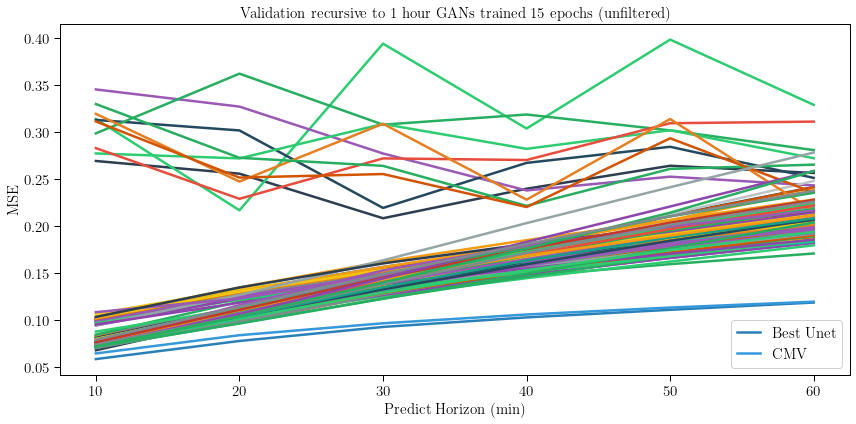

In [4]:
outputs = gan_experiments['val_recursive_1hour_models_15epochs']

# 1.1) Plot all values witout filtering

save_fig = False
show_legend = True

# Enable latex text edit
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Plot
fig = plt.figure()
fig.set_size_inches(12, 6)
ax = fig.add_subplot(1, 1, 1)

# Labels and Title
ax.set_title(r'Validation recursive to 1 hour GANs trained 15 epochs (unfiltered) ', fontsize=fontSize)
ax.set_xlabel(r'Predict Horizon (min)', fontsize=fontSize)
ax.set_ylabel(r'MSE', fontsize=fontSize)


# Tick size
ax.xaxis.set_tick_params(labelsize=fontSize)
ax.yaxis.set_tick_params(labelsize=fontSize)  

# Thicknes and axis colors
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.0)
ax.tick_params(direction='out', length=6, width=1, colors='k')

# Plotting 
for k in outputs.keys():
    ax.plot(range(10, 70, 10), outputs[k], color=Colors.random_color(del_subpalettes=['blues']), linewidth=2.5)

ax.plot(range(10, 70, 10), best_unet, color=Colors.belizeHole, linewidth=2.5, label=r'Best Unet')
ax.plot(range(10, 70, 10), cmv, color=Colors.peterRiver, linewidth=2.5, label=r'CMV')

# Text over plots
if show_legend:
    ax.legend(shadow=False, loc=4, handlelength=1.5,
            fontsize=fontSize, framealpha=0.9)

# Save figure as PDF
if save_fig:
    fig.tight_layout() 
    fig.savefig('./plot_name.pdf')
    
plt.tight_layout()
plt.show()

Outliers filtered: ['aaah8', 'aaai3', 'aaai4', 'aaal4', 'aaal8', 'aaam4', 'aaam6', 'aaam7', 'aaam8', 'aaam11']


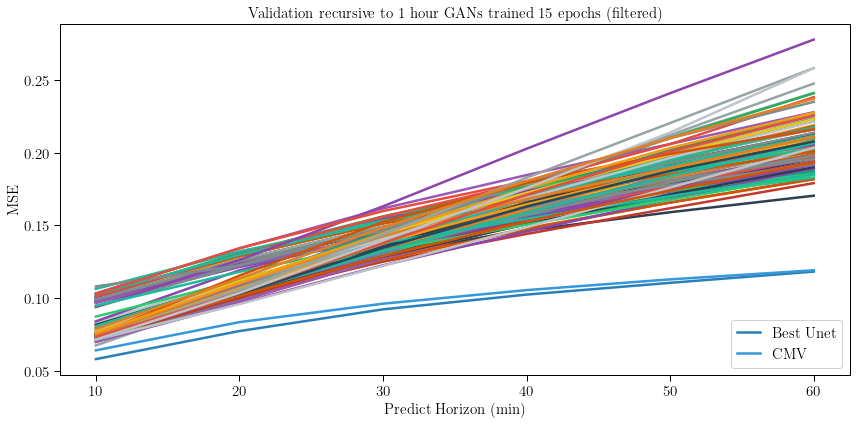

In [5]:
# 1.2) Plot all values filtering

outlier_exps = []
for k in outputs.keys():
    if outputs[k][0] > 0.25:
        outlier_exps.append(k)
print(f'Outliers filtered: {outlier_exps}')

save_fig = False
show_legend = True

# Enable latex text edit
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Plot
fig = plt.figure()
fig.set_size_inches(12, 6)
ax = fig.add_subplot(1, 1, 1)

# Labels and Title
ax.set_title(r'Validation recursive to 1 hour GANs trained 15 epochs (filtered) ', fontsize=fontSize)
ax.set_xlabel(r'Predict Horizon (min)', fontsize=fontSize)
ax.set_ylabel(r'MSE', fontsize=fontSize)


# Tick size
ax.xaxis.set_tick_params(labelsize=fontSize)
ax.yaxis.set_tick_params(labelsize=fontSize)  

# Thicknes and axis colors
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.0)
ax.tick_params(direction='out', length=6, width=1, colors='k')

# Plotting 
for k in outputs.keys():
    if k not in outlier_exps:
        ax.plot(range(10, 70, 10), outputs[k], color=Colors.random_color(del_subpalettes=['blues']), linewidth=2.5)

ax.plot(range(10, 70, 10), best_unet, color=Colors.belizeHole, linewidth=2.5, label=r'Best Unet')
ax.plot(range(10, 70, 10), cmv, color=Colors.peterRiver, linewidth=2.5, label=r'CMV')

# Text over plots
if show_legend:
    ax.legend(shadow=False, loc=4, handlelength=1.5,
            fontsize=fontSize, framealpha=0.9)

# Save figure as PDF
if save_fig:
    fig.tight_layout() 
    fig.savefig('./plot_name.pdf')
    
plt.tight_layout()
plt.show()

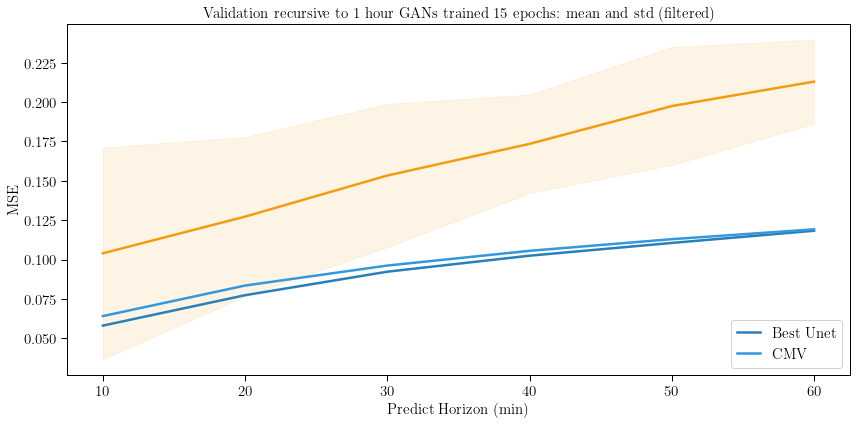

In [6]:
# 1.3) Plot mean and std for all models (filtered)

save_fig = False
show_legend = True

# Enable latex text edit
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Plot
fig = plt.figure()
fig.set_size_inches(12, 6)
ax = fig.add_subplot(1, 1, 1)

# Labels and Title
ax.set_title(r'Validation recursive to 1 hour GANs trained 15 epochs: mean and std (filtered)', fontsize=fontSize)
ax.set_xlabel(r'Predict Horizon (min)', fontsize=fontSize)
ax.set_ylabel(r'MSE', fontsize=fontSize)


# Tick size
ax.xaxis.set_tick_params(labelsize=fontSize)
ax.yaxis.set_tick_params(labelsize=fontSize)  

# Thicknes and axis colors
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.0)
ax.tick_params(direction='out', length=6, width=1, colors='k')

# Plotting 
stacked_outputs = []
for k in outputs.keys():
    if outputs[k] not in outlier_exps:
        stacked_outputs.append(outputs[k])

stacked_outputs = np.array(stacked_outputs)

mean = np.mean(stacked_outputs, axis=0)
std = np.std(stacked_outputs, axis=0)

ax.plot(range(10, 70, 10), mean, color=Colors.orange, linewidth=2.5)
plt.fill_between(range(10, 70, 10), mean - std, mean + std, color=Colors.orange, alpha=.1)

ax.plot(range(10, 70, 10), best_unet, color=Colors.belizeHole, linewidth=2.5, label=r'Best Unet')
ax.plot(range(10, 70, 10), cmv, color=Colors.peterRiver, linewidth=2.5, label=r'CMV')

# Text over plots
if show_legend:
    ax.legend(shadow=False, loc=4, handlelength=1.5,
            fontsize=fontSize, framealpha=0.9)

# Save figure as PDF
if save_fig:
    fig.tight_layout() 
    fig.savefig('./plot_name.pdf')
    
plt.tight_layout()
plt.show()

## PLOT NO2: validation loss on all models for every epoch

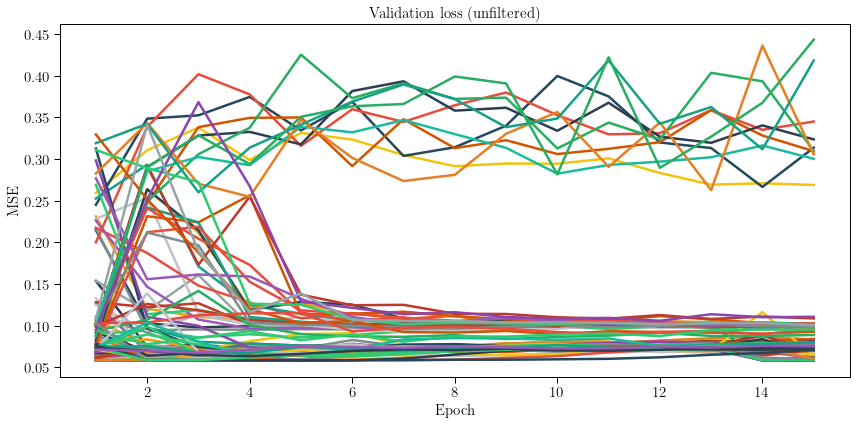

In [9]:
outputs = gan_experiments['val_epoch_loss']

# 2.1) Val loss for every epoch unfiltered

save_fig = False
show_legend = False

# Enable latex text edit
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Plot
fig = plt.figure()
fig.set_size_inches(12, 6)
ax = fig.add_subplot(1, 1, 1)

# Labels and Title
ax.set_title(r'Validation loss (unfiltered) ', fontsize=fontSize)
ax.set_xlabel(r'Epoch', fontsize=fontSize)
ax.set_ylabel(r'MSE', fontsize=fontSize)


# Tick size
ax.xaxis.set_tick_params(labelsize=fontSize)
ax.yaxis.set_tick_params(labelsize=fontSize)  

# Thicknes and axis colors
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.0)
ax.tick_params(direction='out', length=6, width=1, colors='k')

# Plotting 
x = range(1, 16)
for k in outputs.keys():
    ax.plot(x, outputs[k], color=Colors.random_color(del_subpalettes=['blues']), linewidth=2.5)

# Text over plots
if show_legend:
    ax.legend(shadow=False, loc=4, handlelength=1.5,
            fontsize=fontSize, framealpha=0.9)

# Save figure as PDF
if save_fig:
    fig.tight_layout() 
    fig.savefig('./plot_name.pdf')
    
plt.tight_layout()
plt.show()


Filtered experiments: ['aaah8', 'aaai3', 'aaai4', 'aaal4', 'aaal8', 'aaam4', 'aaam6', 'aaam7', 'aaam8', 'aaam11']


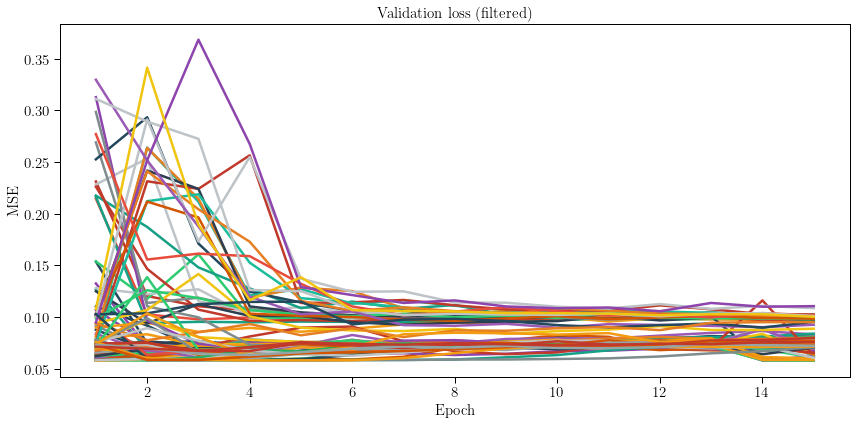

In [11]:
# 2.2) Val loss for every epoch filtered

filtered_val_loss = []

for k in outputs.keys():
    if outputs[k][-1] > 0.2:
        filtered_val_loss.append(k)
print(f'Filtered experiments: {filtered_val_loss}')

save_fig = False
show_legend = False

# Enable latex text edit
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Plot
fig = plt.figure()
fig.set_size_inches(12, 6)
ax = fig.add_subplot(1, 1, 1)

# Labels and Title
ax.set_title(r'Validation loss (filtered) ', fontsize=fontSize)
ax.set_xlabel(r'Epoch', fontsize=fontSize)
ax.set_ylabel(r'MSE', fontsize=fontSize)


# Tick size
ax.xaxis.set_tick_params(labelsize=fontSize)
ax.yaxis.set_tick_params(labelsize=fontSize)  

# Thicknes and axis colors
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.0)
ax.tick_params(direction='out', length=6, width=1, colors='k')

# Plotting 
x = range(1, 16)
for k in outputs.keys():
    if k not in filtered_val_loss:
        ax.plot(x, outputs[k], color=Colors.random_color(del_subpalettes=['blues']), linewidth=2.5)

# Text over plots
if show_legend:
    ax.legend(shadow=False, loc=4, handlelength=1.5,
            fontsize=fontSize, framealpha=0.9)

# Save figure as PDF
if save_fig:
    fig.tight_layout() 
    fig.savefig('./plot_name.pdf')
    
plt.tight_layout()
plt.show()


[[0.1264763 0.068449  0.0663953 ... 0.0701722 0.0751083 0.0743096]
 [0.0691    0.0621383 0.0669462 ... 0.0729364 0.0726721 0.0732933]
 [0.1264763 0.068449  0.0663953 ... 0.0701722 0.0751083 0.0743096]
 ...
 [0.1264763 0.068449  0.0663953 ... 0.0701722 0.0751083 0.0743096]
 [0.1536655 0.074533  0.0769008 ... 0.0816849 0.0808397 0.0818055]
 [0.1264763 0.068449  0.0663953 ... 0.0701722 0.0751083 0.0743096]]
[[2, 1, 12, 11, 3, 7, 9, 4, 10, 14, 6, 13, 8, 5, 0], [1, 2, 0, 5, 13, 6, 12, 9, 3, 7, 14, 4, 10, 11, 8], [2, 1, 12, 11, 3, 7, 9, 4, 10, 14, 6, 13, 8, 5, 0], [3, 4, 1, 5, 6, 7, 8, 2, 9, 11, 10, 13, 12, 14, 0], [2, 1, 3, 0, 4, 8, 9, 14, 12, 11, 13, 7, 10, 6, 5], [2, 1, 3, 0, 4, 8, 9, 14, 12, 11, 13, 7, 10, 6, 5], [3, 4, 1, 5, 6, 7, 8, 2, 9, 11, 10, 13, 12, 14, 0], [0, 2, 1, 3, 8, 7, 9, 12, 13, 10, 4, 11, 14, 6, 5], [2, 1, 3, 0, 4, 8, 9, 14, 12, 11, 13, 7, 10, 6, 5], [2, 1, 3, 0, 4, 8, 9, 14, 12, 11, 13, 7, 10, 6, 5]]
[]


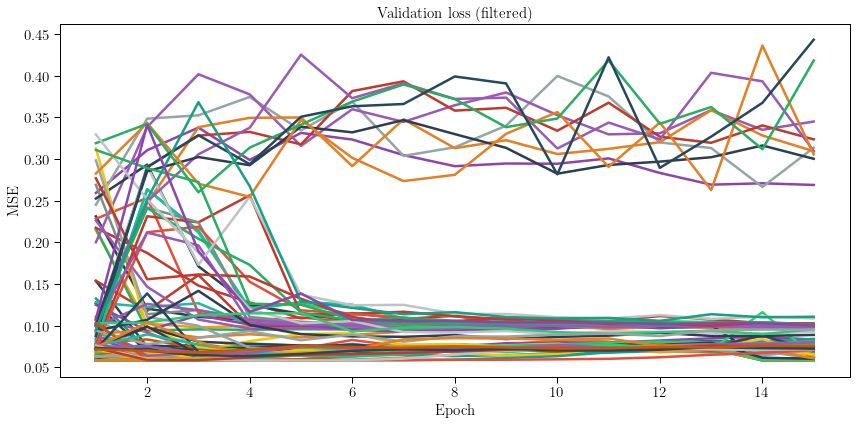

In [21]:
# 2.2) Val loss for every epoch filtered: only the 10 best experiments

# I find the best val_loss (doesnt matter which epoch) and grab the 10
# best experiments respect to that loss

stacked_outputs = []
for k in outputs.keys():
    if outputs[k] not in outlier_exps:
        stacked_outputs.append(outputs[k])
stacked_outputs = np.array(stacked_outputs)

# que quiero yo?
# quiero el num de fila de los 10 exps tales que los valores son los menores


#print(stacked_outputs)
min_val_idx_for_row = np.argmin(stacked_outputs, axis=1) # idx de donde esta el menor valor para cada fila
# ahora obtengo esos valores y hago otra lista
min_val_for_row = stacked_outputs[min_val_idx_for_row] # aca tengo los vals minimos para cada experimento

# ahora quiero el indice de los 10 menores valores en min_val_for_row
n = 10
print(min_val_for_row)
min_val_idx_for_exp = min_val_for_row.argsort()[:n]

# ahora quiero stacked_outputs evaluada solo en esos experimentos
# los elementos de min_val_idx_for_exp son el numero de iter en donde se dan los menores valores
n_best_exp = []

for idx, k in enumerate(outputs.keys()):
    if idx in min_val_idx_for_exp.tolist():
        n_best_exp.append(k)
print(min_val_idx_for_exp.tolist())
print(n_best_exp)

save_fig = False
show_legend = False

# Enable latex text edit
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Plot
fig = plt.figure()
fig.set_size_inches(12, 6)
ax = fig.add_subplot(1, 1, 1)

# Labels and Title
ax.set_title(r'Validation loss (filtered) ', fontsize=fontSize)
ax.set_xlabel(r'Epoch', fontsize=fontSize)
ax.set_ylabel(r'MSE', fontsize=fontSize)


# Tick size
ax.xaxis.set_tick_params(labelsize=fontSize)
ax.yaxis.set_tick_params(labelsize=fontSize)  

# Thicknes and axis colors
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.0)
ax.tick_params(direction='out', length=6, width=1, colors='k')

# Plotting 
x = range(1, 16)
for k in outputs.keys():
    if k not in filtered_val_loss:
        ax.plot(x, outputs[k], color=Colors.random_color(del_subpalettes=['blues']), linewidth=2.5)

# Text over plots
if show_legend:
    ax.legend(shadow=False, loc=4, handlelength=1.5,
            fontsize=fontSize, framealpha=0.9)

# Save figure as PDF
if save_fig:
    fig.tight_layout() 
    fig.savefig('./plot_name.pdf')
    
plt.tight_layout()
plt.show()
